In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

img_path = '/content/img.jpg'

YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/107.7 GB disk)


detect: weights=['yolov5s.pt'], source=/content/img.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CPU

100% 14.1M/14.1M [00:00<00:00, 84.4MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/img.jpg: 384x640 1 person, 1 cell phone, 252.5ms
Speed: 2.0ms pre-process, 252.5ms inference, 22.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


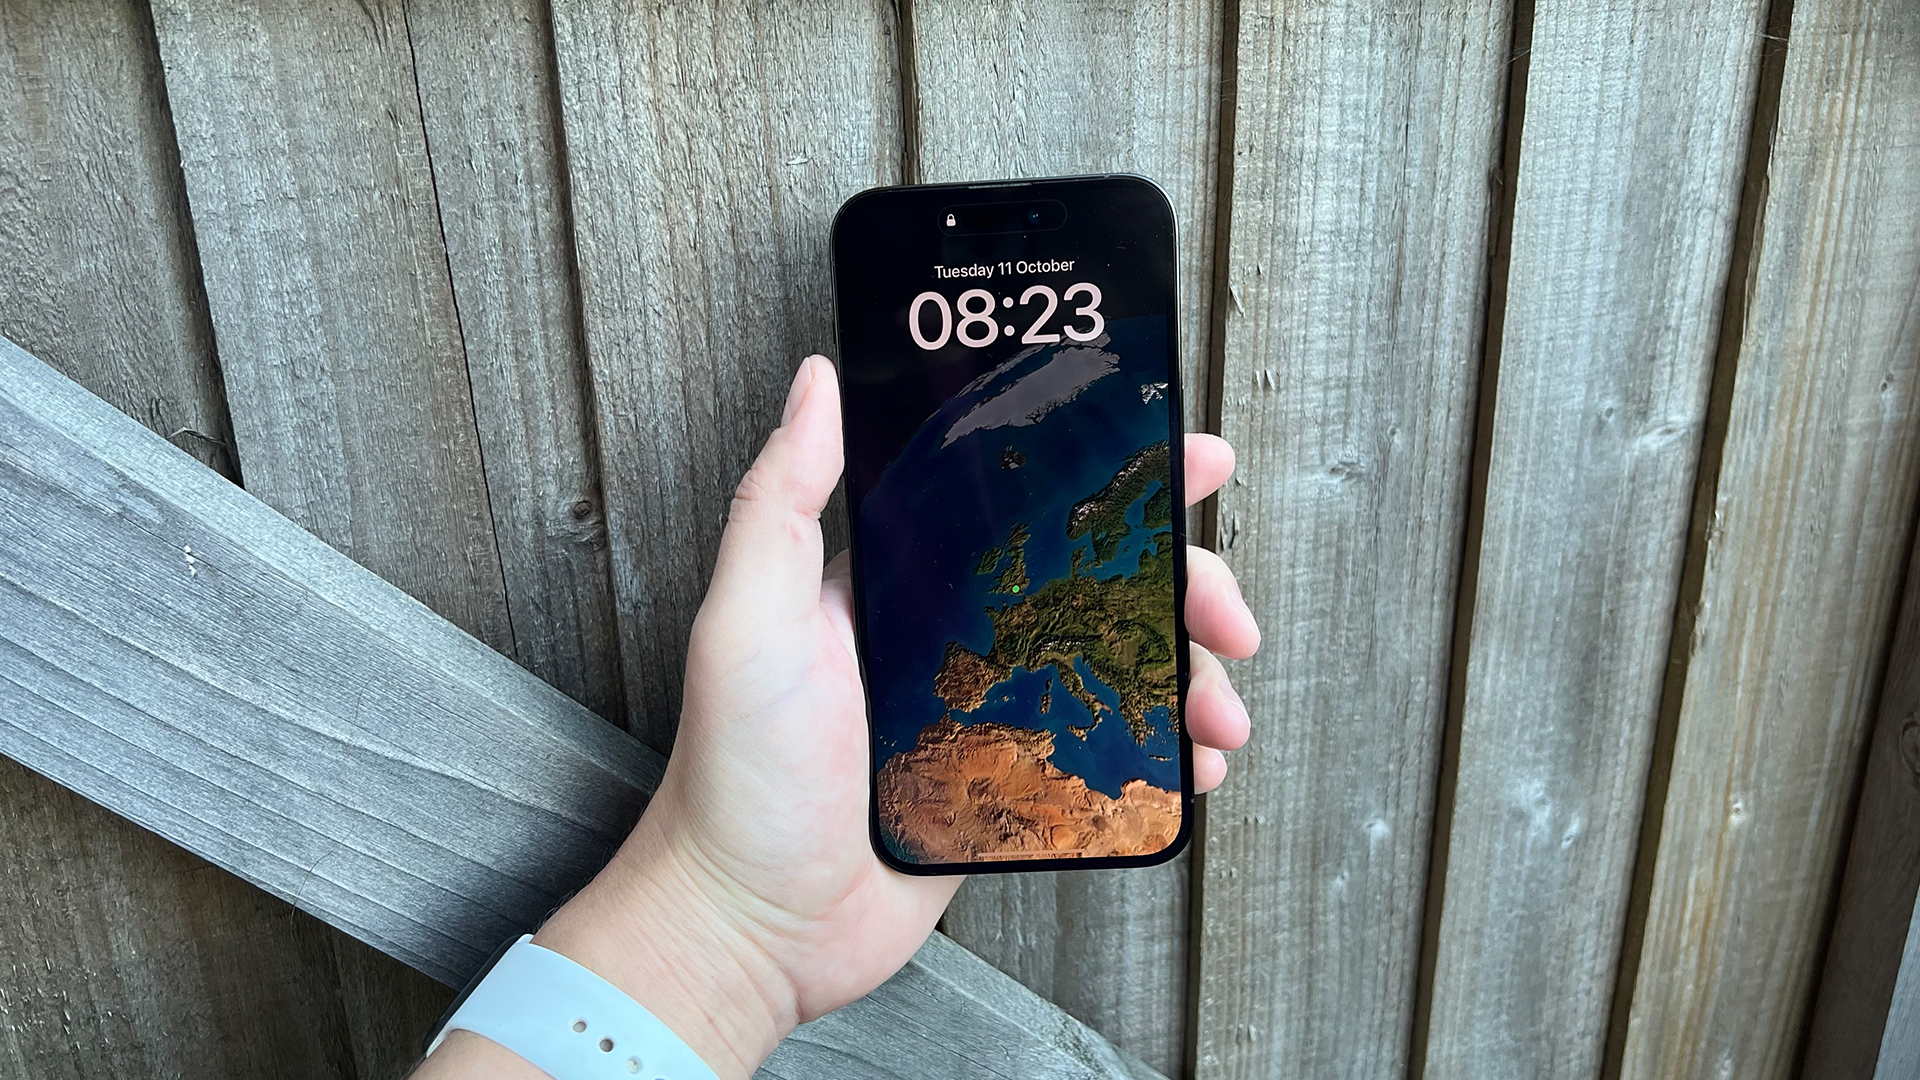

In [2]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source /content/img.jpg
display.Image(filename=img_path, width=600)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 



 Height: 724.98, Width: 587.96 



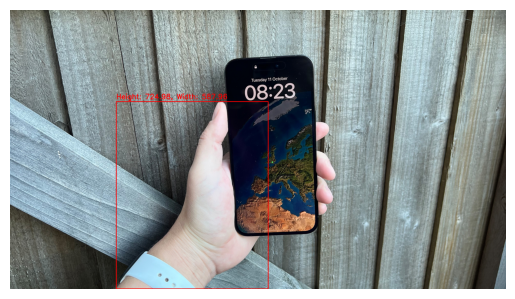

In [6]:
%matplotlib inline
import cv2
import torch
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Load input image
image = Image.open(img_path)

# Perform object detection
results = model(image)

# Extract bounding box coordinates
boxes = results.xyxy[0][:, :4]

# Choose the first bounding box (you can modify this based on your requirements)
bounding_box = boxes[0]

# Calculate height and width
x_min, y_min, x_max, y_max = bounding_box
height = y_max - y_min
width = x_max - x_min

# Draw bounding box on the image
image_with_box = np.array(image)
cv2.rectangle(image_with_box, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 0, 0), 2)

# Add text annotation
text = f"Height: {height:.2f}, Width: {width:.2f}"
print('\n', text, '\n')
cv2.putText(image_with_box, text, (int(x_min), int(y_min) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Display the image with bounding box and annotations
plt.imshow(image_with_box)
plt.axis('off')
plt.show()

Height: 692.61, Width: 358.52 



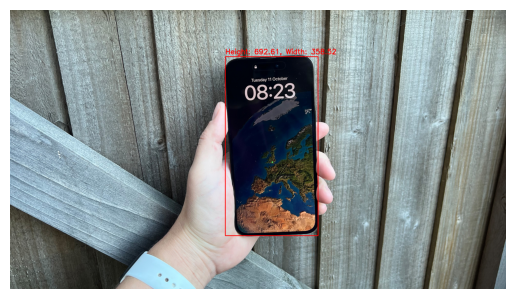

In [7]:
# Choose the second bounding box
bounding_box = boxes[1]

# Calculate height and width
x_min, y_min, x_max, y_max = bounding_box
height = y_max - y_min
width = x_max - x_min

# Draw bounding box on the image
image_with_box = np.array(image)
cv2.rectangle(image_with_box, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 0, 0), 2)

# Add text annotation
text = f"Height: {height:.2f}, Width: {width:.2f}"
print(text, '\n')
cv2.putText(image_with_box, text, (int(x_min), int(y_min) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Display the image with bounding box and annotations
plt.imshow(image_with_box)
plt.axis('off')
plt.show()